# Capstone Project
### Applied Data Science Capstone by IBM/Coursera

#### By Andrew Pang

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

The state of Washington wants to open up a new skatepark in their most populous county, King County. What is the current state of skateparks in Washington and where should the next skatepark be built?



## Data <a name="data"></a>

I will be using three different data sources and will compile them into a single dataframe.
1) Wikipedia, for city data

2) Geopy, to get lat & long of each city

3) Foursquare API, for skatepark data


I will be web scraping wikipedia for data tables such as [List of municipalities in Washington](https://en.wikipedia.org/wiki/List_of_municipalities_in_Washington). Since we are only interested in King County, we can filter by county. We will scrap and store all of columns of the wikipedia page but will only use what is needed in the dataframe.

Some features to consider about our county:

    - Name, Type, County, Population, and Population Growth for each city.
    

#### Import libraries to start

In [1]:
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

Grab the wikipedia url page and load up the `soup` object

In [2]:
url = "https://en.wikipedia.org/wiki/List_of_municipalities_in_Washington"

html_data  = requests.get(url).text 

soup = BeautifulSoup(html_data,"html5lib")  # create a soup object using the variable 'html_data'

Check the title of the url

In [3]:
print(soup.title)

<title>List of municipalities in Washington - Wikipedia</title>


Now that the url is correct, lets web scrap and load up `washington_data`.

In [4]:
washington_data = pd.DataFrame(columns=["Name", "County", "Population 2019 Estimate", "Population 2010 Census", "Growth 2010-2019", "Land Area (sq mi)", "Land area (km^2)"])

# print(soup.find("table",{"class":"wikitable sortable"}).find("tbody").find_all("tr"))

for row in soup.find("table",{"class":"wikitable sortable"}).find("tbody").find_all("tr"):
    col = row.find_all("td")
    if(col):
#         print("Name: "+col[0].text.strip())
#         print("Type: "+col[1].text.strip())
#         print("County: "+col[2].text.strip())
#         print(col[2])
#         print(len(col[2].find_all("a", recursive=False)))
#         print("Population 2019 Estimate: "+ col[3].text.strip())
#         print("Population 2010 Census: "+col[4].text.strip())
#         print("Growth 2010-2019: "+col[5].text.strip())
#         print("Land Area (sq mi): "+col[6].text.strip())
#         print("Land area (km^2): "+col[7].text.strip())
        name = col[0].text.strip()
    
        if(len(col[2].find_all("a", recursive=False)) == 1):
            county = col[2].text.strip()
        elif(len(col[2].find_all("a", recursive=False)) > 1):
            counties = []
            for i in col[2].find_all("a", recursive=False):
                counties.append(i.text)
            counties.sort()
            county = ",".join(counties)
        
        pop_2019 = col[3].text.strip()
        pop_2010 = col[4].text.strip()
        growth_2010_2019 = col[5].text.strip()
        land_area_sqmi = col[6].text.strip()
        land_area_km2 = col[7].text.strip()
        washington_data = washington_data.append({"Name":name, "County":county, "Population 2019 Estimate": pop_2019, "Population 2010 Census": pop_2010, "Growth 2010-2019": growth_2010_2019, "Land Area (sq mi)": land_area_sqmi, "Land area (km^2)": land_area_km2}, ignore_index=True)
        

Lets check out `washington_data`

In [5]:
washington_data.head()

,Name,County,Population 2019 Estimate,Population 2010 Census,Growth 2010-2019,Land Area (sq mi),Land area (km^2)
0,Aberdeen,Grays Harbor,"16,756","16,896",-0.83%,10.65,27.6
1,Airway Heights,Spokane,"9,485","6,114",55.14%,5.12,13.3
2,Algona,King,"3,208","3,014",6.44%,1.30,3.4
3,Anacortes,Skagit,"17,527","15,778",11.09%,11.76,30.5
4,Arlington,Snohomish,"20,523","17,926",14.49%,9.30,24.1


In [6]:
print("There are {0} rows and {1} columns".format(washington_data.shape[0],washington_data.shape[1]))

There are 212 rows and 7 columns


Lets check out how many cities are in each county.

In [7]:
washington_data['County'].value_counts()

King              30
Snohomish         17
Pierce            15
Yakima            12
Grant             10
Grays Harbor       9
Spokane            9
Lewis              8
Whatcom            7
Clark              6
Thurston           6
Okanogan           6
Chelan             5
Benton             5
King,Pierce        4
Walla Walla        4
Franklin           4
Whitman            4
Skagit             4
Pacific            4
Cowlitz            4
Kitsap             4
Kittitas           4
Clallam            3
Douglas            3
Lincoln            3
Klickitat          3
Stevens            3
Asotin             2
Island             2
Adams              2
Skamania           2
Mason              1
Jefferson          1
King,Snohomish     1
Garfield           1
Columbia           1
Ferry              1
Pend Oreille       1
Clark,Cowlitz      1
Name: County, dtype: int64

**King County has the most cities with a total of 30.** Notice some cities are in two counties.

#### Data Cleaning - dtypes

Lets look at what the `dtypes` are and lets change any type if needed

In [8]:
washington_data.dtypes

Name                        object
County                      object
Population 2019 Estimate    object
Population 2010 Census      object
Growth 2010-2019            object
Land Area (sq mi)           object
Land area (km^2)            object
dtype: object

Lets change any `population` column to `int` or `float`

In [9]:
washington_data['Population 2019 Estimate'] = washington_data['Population 2019 Estimate'].str.replace(',', '').astype(int)
washington_data['Population 2010 Census'] = washington_data['Population 2010 Census'].str.replace(',', '').astype(int)
washington_data['Growth 2010-2019'] = washington_data['Growth 2010-2019'].str.replace('%', '').astype(float)

Lets do a final `dtypes` check

In [10]:
washington_data.dtypes

Name                         object
County                       object
Population 2019 Estimate      int64
Population 2010 Census        int64
Growth 2010-2019            float64
Land Area (sq mi)            object
Land area (km^2)             object
dtype: object

#### Let's only look at the cities within King County

Lets take a subset of `washington_data` where the city is in King County. Lets call this subset, `washington_king_data`. We will work on `washington_king_data` dataframe moving forward so we can make fewer api calls in this notebook.

In [11]:
washington_king_data = washington_data[washington_data['County'].str.contains('King')]

In [12]:
washington_king_data = washington_king_data.reset_index(drop=True)

In [13]:
washington_king_data.head()

,Name,County,Population 2019 Estimate,Population 2010 Census,Growth 2010-2019,Land Area (sq mi),Land area (km^2)
0,Algona,King,3208,3014,6.44,1.30,3.4
1,Auburn,"King,Pierce",81464,70180,16.08,29.62,76.7
2,Bellevue,King,148164,122363,21.09,33.48,86.7
3,Black Diamond,King,4781,4151,15.18,6.56,17.0
4,Bothell,"King,Snohomish",47415,33505,41.52,12.10,31.3


#### Lets use `geopy` to look lat & long

We will use `geopy.geocoders` to look up lat & long cord for each city and insert into `washington_king_data`

In [14]:
from geopy.geocoders import Nominatim

Lets add new columns for `washington_king_data` first.

In [15]:
washington_king_data['lat'] = np.nan
washington_king_data['long'] = np.nan

Lets check out the dataframe before we start adding lats and longs

In [16]:
washington_king_data.head()

,Name,County,Population 2019 Estimate,Population 2010 Census,Growth 2010-2019,Land Area (sq mi),Land area (km^2),lat,long
0,Algona,King,3208,3014,6.44,1.30,3.4,NaN,NaN
1,Auburn,"King,Pierce",81464,70180,16.08,29.62,76.7,NaN,NaN
2,Bellevue,King,148164,122363,21.09,33.48,86.7,NaN,NaN
3,Black Diamond,King,4781,4151,15.18,6.56,17.0,NaN,NaN
4,Bothell,"King,Snohomish",47415,33505,41.52,12.10,31.3,NaN,NaN


In [17]:
geolocator = Nominatim(user_agent="capstone")
lats = []
longs = []

for city in washington_king_data['Name']:
    location = geolocator.geocode(city + ", WA")
    print("{0}, WA - {1}, {2}".format(city, location.latitude, location.longitude))
    lats.append(location.latitude)
    longs.append(location.longitude)
    
print("length of lats and longs. {0} : {1}".format(len(lats), len(longs)))

Algona, WA - 43.0699663, -94.233019
Auburn, WA - 47.3075369, -122.2301808
Bellevue, WA - 47.6144219, -122.192337
Black Diamond, WA - 47.3083078, -122.0037583
Bothell, WA - 47.7598697, -122.2068288
Burien, WA - 47.469918, -122.3485274
Carnation, WA - 47.6475134, -121.9129419
Clyde Hill, WA - 47.631569, -122.2181054
Covington, WA - 47.3657791, -122.100222
Des Moines, WA - 41.5910323, -93.6046655
Duvall, WA - 47.7423219, -121.9856782
Enumclaw, WA - 47.2047793, -121.9916371
Federal Way, WA - 47.313494, -122.3393103
Issaquah, WA - 47.5348778, -122.0432974
Kenmore, WA - 47.7573202, -122.2440148
Kent, WA - 47.3826903, -122.2270272
Kirkland, WA - 47.6859573, -122.1920249
Lake Forest Park, WA - 47.7567679, -122.2809623
Maple Valley, WA - 47.3664231, -122.0437127
Medina, WA - 47.620548, -122.2264453
Mercer Island, WA - 47.5602073, -122.22014226861951
Milton, WA - 40.6744694, -92.161213
Newcastle, WA - 47.5395736, -122.1563331
Normandy Park, WA - 47.4351528, -122.339601
North Bend, WA - 47.495946

In [18]:
washington_king_data['lat'] = lats
washington_king_data['long'] = longs

In [19]:
washington_king_data.head()

,Name,County,Population 2019 Estimate,Population 2010 Census,Growth 2010-2019,Land Area (sq mi),Land area (km^2),lat,long
0,Algona,King,3208,3014,6.44,1.30,3.4,43.069966,-94.233019
1,Auburn,"King,Pierce",81464,70180,16.08,29.62,76.7,47.307537,-122.230181
2,Bellevue,King,148164,122363,21.09,33.48,86.7,47.614422,-122.192337
3,Black Diamond,King,4781,4151,15.18,6.56,17.0,47.308308,-122.003758
4,Bothell,"King,Snohomish",47415,33505,41.52,12.10,31.3,47.759870,-122.206829


## Methodology <a name="methodology"></a>

Now that we have the `lat` and `long` of each city in `washington_king_data`, lets view it on the map.

By using `folium`, we can get a better idea of where our cities are located. We will create a heatmap of all the cities population. 

Then by using Foursquare API, we can search the locations of skateparks. For each skatepark, we'll grab their `name`,`lat`,`lng`, and `city` into `washington_king_data`. With this data, we hope to see if population relates to the number of skateparks and then help make a more informed decision about where to build the next new skatepark.

## Analysis <a name="analysis"></a>

Let's begin by importing libraries and create King County map

In [20]:
import folium

In [21]:
# King County latitude and longitude values
king_county_latitude = 47.47
king_county_longitude = -121.84 

In [22]:
# create map and display it
king_county_map = folium.Map(location=[king_county_latitude, king_county_longitude], zoom_start=8)

# display the map of King County
# king_county_map

#### Display a `folium` map of all the cities within King County

In [23]:
# instantiate a feature group for the cities in the dataframe
cities = folium.map.FeatureGroup()

# loop through and add each to the incidents feature group
for lat, lng, label in zip(washington_king_data.lat, washington_king_data.long, washington_king_data.Name):
    cities.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            popup=label,
            fill_color='blue',
            fill_opacity=0.6
        )
    )   
    
# add cities to map
king_county_map.add_child(cities)

---

#### Display a `folium` heat map of the population within King County

In [24]:
from folium.plugins import HeatMap

In [25]:
# create map and display it
# king_county_map = folium.Map(location=[king_county_latitude, king_county_longitude], zoom_start=8, min_zoom=6)

HeatMap(data=washington_king_data[['lat', 'long', 'Population 2019 Estimate']].values.tolist(), radius=25, blur=15, min_opacity=0.5).add_to(king_county_map)

# show map
king_county_map

---

#### Display a bar group with Population 2019 Estimate & Population 2010 Census

Lets see where the top 10 most populous cities are within King County.

In [26]:
washington_king_data_top_10 = washington_king_data.sort_values(['Population 2019 Estimate'], ascending=False).head(10)
washington_king_data_top_10 = washington_king_data_top_10.reset_index(drop=True)
# washington_king_data_top_10.head(10)

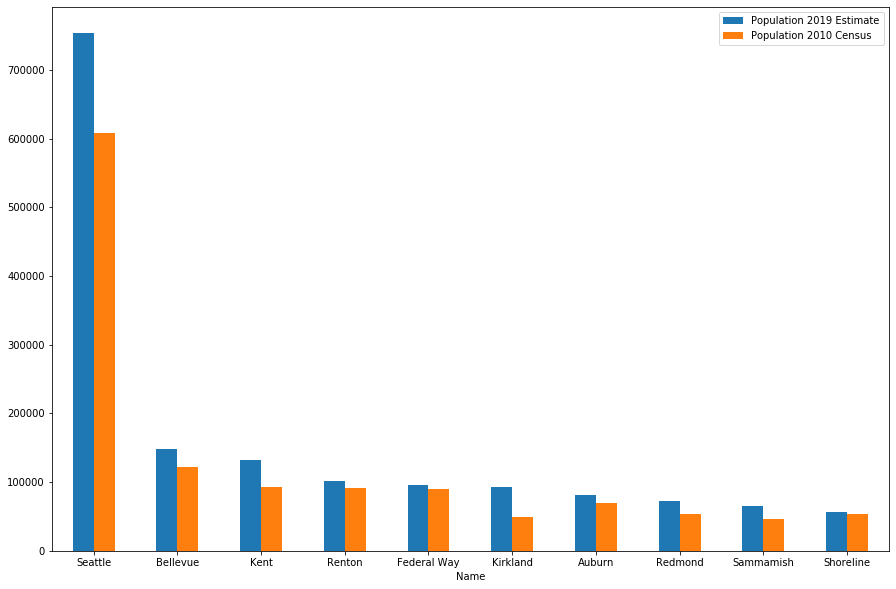

In [27]:
washington_king_data_top_10.plot.bar(x='Name', y=['Population 2019 Estimate', 'Population 2010 Census'], rot=0, figsize=(15, 10))

The cities with the highest population are **Seattle**, **Bellevue**, and **Kent**. <a name="results-highest-pop">[link]</a>

Lets see where the top 10 cities are located.

In [28]:
# create map and display it
washington_king_data_top_10_map = folium.Map(location=[king_county_latitude, king_county_longitude], zoom_start=8, min_zoom=6)

# loop through the 100 crimes and add each to the map
for lat, lng, label in zip(washington_king_data_top_10.lat, washington_king_data_top_10.long, washington_king_data_top_10.Name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5, # define how big you want the circle markers to be
        color='yellow',
        fill=True,
        popup=label,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(washington_king_data_top_10_map)

# show map
washington_king_data_top_10_map

---

#### Which top 10 cites are growing the fastest?

In [29]:
washington_king_data_top_10_growing = washington_king_data_top_10.sort_values(['Growth 2010-2019'], ascending=False)
washington_king_data_top_10_growing = washington_king_data_top_10_growing.reset_index(drop=True)

In [30]:
washington_king_data_top_10_growing.head(10)

,Name,County,Population 2019 Estimate,Population 2010 Census,Growth 2010-2019,Land Area (sq mi),Land area (km^2),lat,long
0,Kirkland,King,93010,48787,90.65,17.82,46.2,47.685957,-122.192025
1,Sammamish,King,65892,45780,43.93,18.41,47.7,47.608844,-122.042307
2,Kent,King,132319,92411,43.19,33.76,87.4,47.382690,-122.227027
3,Redmond,King,71929,54144,32.85,16.47,42.7,47.669414,-122.123877
4,Seattle,King,753675,608660,23.83,83.84,217.1,47.603832,-122.330062
5,Bellevue,King,148164,122363,21.09,33.48,86.7,47.614422,-122.192337
6,Auburn,"King,Pierce",81464,70180,16.08,29.62,76.7,47.307537,-122.230181
7,Renton,King,101751,90927,11.90,23.37,60.5,47.479908,-122.203450
8,Federal Way,King,96289,89306,7.82,22.27,57.7,47.313494,-122.339310
9,Shoreline,King,57027,53007,7.58,11.67,30.2,47.755883,-122.341043


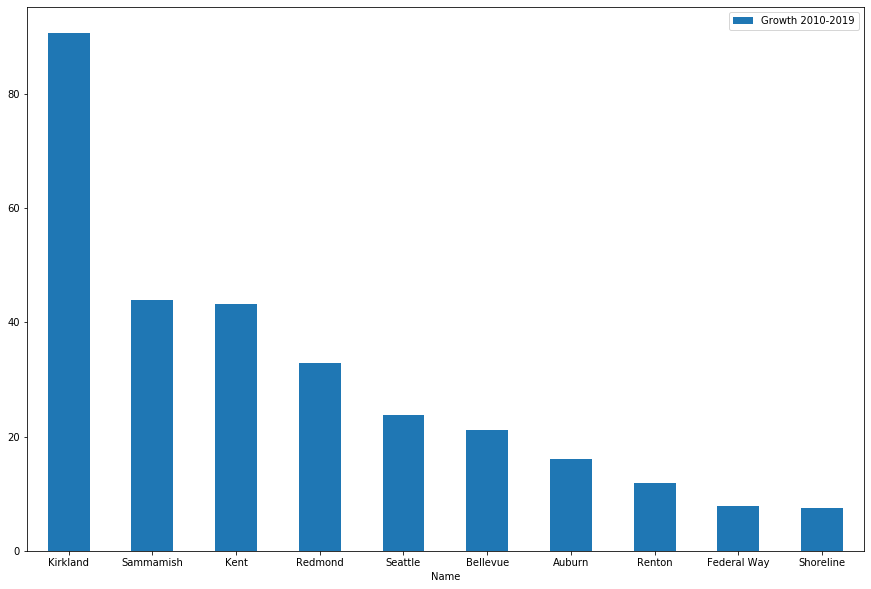

In [31]:
washington_king_data_top_10_growing.plot.bar(x='Name', y='Growth 2010-2019', rot=0, figsize=(15, 10))

Looks like **Kirkland is the fastest growing city** within the top 10. Kirkland grow 90.65% between 2010 to 2019. <a name="results-rising-pop">[link]</a>

---

#### Lets start utilizing the Foursquare API to explore the skateparks in cities

#### Define Foursquare Credentials and Version

In [1]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
# LIMIT = 10 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 
CLIENT_SECRET:


In [33]:
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

In [35]:
city_latitude = washington_king_data_top_10.loc[0, 'lat'] # neighborhood latitude value
city_longitude = washington_king_data_top_10.loc[0, 'long'] # neighborhood longitude value

city_name = washington_king_data_top_10.loc[0, 'Name'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(city_name, 
                                                               city_latitude, 
                                                               city_longitude))

url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&query=skatepark'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        city_latitude, 
        city_longitude)
print(url) # display URL

Latitude and longitude values of Seattle are 47.6038321, -122.3300624.
https://api.foursquare.com/v2/venues/search?&client_id=SK2HKGBVQ45YUMO0A03Q0NOKM41SOUTFZB1JMPEIFIDP5ITR&client_secret=3LJR5KY4X00DGB2PZYUACYF4XQYHNC1YNTTLYZC01MTIP100&v=20180605&ll=47.6038321,-122.3300624&query=skatepark


In [36]:
results = requests.get(url).json()

# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
df_venues = pd.json_normalize(venues)
df_venues.head()

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet,venuePage.id
0,4e5e87a0aeb78833bb8ddac8,Delridge Skatepark,"[{'id': '4bf58dd8d48988d167941735', 'name': 'S...",v-1620600679,False,Delridge Way SW,47.564502,-122.364156,"[{'label': 'display', 'lat': 47.56450156106893...",5071,98106,US,Seattle,WA,United States,"[Delridge Way SW, Seattle, WA 98106, United St...",NaN,NaN
1,4b9e91caf964a52006f036e3,Seattle Center Skatepark,"[{'id': '4bf58dd8d48988d167941735', 'name': 'S...",v-1620600679,False,305 Harrison St,47.621191,-122.352934,"[{'label': 'display', 'lat': 47.62119120843321...",2584,98109,US,Seattle,WA,United States,"[305 Harrison St, Seattle, WA 98109, United St...",NaN,NaN
2,4b1b1493f964a520c7f723e3,Marginal Way Skatepark,"[{'id': '4bf58dd8d48988d167941735', 'name': 'S...",v-1620600679,False,24 S Hanford St,47.575630,-122.339282,"[{'label': 'display', 'lat': 47.57563, 'lng': ...",3214,98134,US,Seattle,WA,United States,"[24 S Hanford St, Seattle, WA 98134, United St...",NaN,NaN
3,4c11558272caa59350555da4,Kirkland Skatepark,"[{'id': '4bf58dd8d48988d167941735', 'name': 'S...",v-1620600679,False,NaN,47.677452,-122.200649,"[{'label': 'display', 'lat': 47.6774524354569,...",12703,NaN,US,Kirkland,WA,United States,"[Kirkland, WA, United States]",Central Way,NaN
4,4eea73510e01a148be2cae4e,Jefferson Park Skatepark,"[{'id': '4bf58dd8d48988d167941735', 'name': 'S...",v-1620600679,False,3801 Beacon Ave S,47.569401,-122.308972,"[{'label': 'display', 'lat': 47.56940089365744...",4147,98108,US,Seattle,WA,United States,"[3801 Beacon Ave S, Seattle, WA 98108, United ...",NaN,NaN


In [37]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in df_venues.columns if col.startswith('location.')] + ['id']
dataframe_filtered = df_venues.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

# further reduce unwanted columns
filtered_columns = ['name', 'categories', 'lat', 'lng', 'postalCode', 'city']
dataframe_filtered = dataframe_filtered.loc[:, filtered_columns]

dataframe_filtered


,name,categories,lat,lng,postalCode,city
0,Delridge Skatepark,Skate Park,47.564502,-122.364156,98106,Seattle
1,Seattle Center Skatepark,Skate Park,47.621191,-122.352934,98109,Seattle
2,Marginal Way Skatepark,Skate Park,47.575630,-122.339282,98134,Seattle
3,Kirkland Skatepark,Skate Park,47.677452,-122.200649,NaN,Kirkland
4,Jefferson Park Skatepark,Skate Park,47.569401,-122.308972,98108,Seattle
5,Bainbridge Island Skatepark,Skate Park,47.638248,-122.549088,98110,Bainbridge Island
6,Lower Woodland Skate Park,Skate Park,47.667687,-122.342170,98103,Green Lake
7,All Together Skatepark,Skate Park,47.649596,-122.342307,98103,Seattle
8,Inner Space Skatepark,General Entertainment,47.649593,-122.342247,98103,Seattle
9,Mercer Island Skatepark,Skate Park,47.580474,-122.234933,98040,Mercer Island


Lets drop any rows with `NaN` city

In [38]:
dataframe_filtered = dataframe_filtered.dropna(subset=['city'],axis=0)

Display all found skateparks in `folium` map. <a name="results-skateparks">[link]</a>

In [39]:
# create map and display it
king_county_map = folium.Map(location=[king_county_latitude, king_county_longitude], zoom_start=8)


# instantiate a feature group for the cities in the dataframe
skateparks = folium.map.FeatureGroup()

# loop through and add each to the incidents feature group
for lat, lng, label, city in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.name, dataframe_filtered.city):
#     print("{} {} {} {}".format(lat, lng, label, city))
    skateparks.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            popup=label,
            fill_color='blue',
            fill_opacity=0.6
        )
    )   
    
# add cities to map
king_county_map.add_child(skateparks)
    
king_county_map

Let's group up the skateparks by `city` and count how many skateparks each city has.

In [40]:
df_num_of_skateparks = dataframe_filtered['city'].value_counts()

In [41]:
df_num_of_skateparks.name = 'Number of skateparks'

Lets merge `df_num_of_skateparks` with `washington_king_data` and merge with `Name` as key index.

In [42]:
washington_king_data = washington_king_data.join(df_num_of_skateparks, on='Name')

In [43]:
washington_king_skateparks = washington_king_data.dropna(subset=['Number of skateparks'],axis=0)
washington_king_skateparks.reset_index()

,index,Name,County,Population 2019 Estimate,Population 2010 Census,Growth 2010-2019,Land Area (sq mi),Land area (km^2),lat,long,Number of skateparks
0,2,Bellevue,King,148164,122363,21.09,33.48,86.7,47.614422,-122.192337,4.0
1,13,Issaquah,King,39509,30434,29.82,11.41,29.6,47.534878,-122.043297,1.0
2,14,Kenmore,King,23097,20460,12.89,6.17,16.0,47.757320,-122.244015,1.0
3,16,Kirkland,King,93010,48787,90.65,17.82,46.2,47.685957,-122.192025,2.0
4,20,Mercer Island,King,25894,22699,14.08,6.32,16.4,47.560207,-122.220142,1.0
5,26,Redmond,King,71929,54144,32.85,16.47,42.7,47.669414,-122.123877,1.0
6,27,Renton,King,101751,90927,11.90,23.37,60.5,47.479908,-122.203450,1.0
7,29,SeaTac,King,29044,26909,7.93,10.03,26.0,47.444909,-122.283084,1.0
8,30,Seattle,King,753675,608660,23.83,83.84,217.1,47.603832,-122.330062,12.0
9,33,Tukwila,King,20347,19107,6.49,9.17,23.8,47.462736,-122.255916,1.0


The table above shows all the cities within King County that has at least one skatepark. We will make this table into a new dataframe `washington_king_skateparks`.

In [44]:
washington_king_skateparks = washington_king_skateparks.sort_values(['Number of skateparks', 'Population 2019 Estimate'], ascending=False)

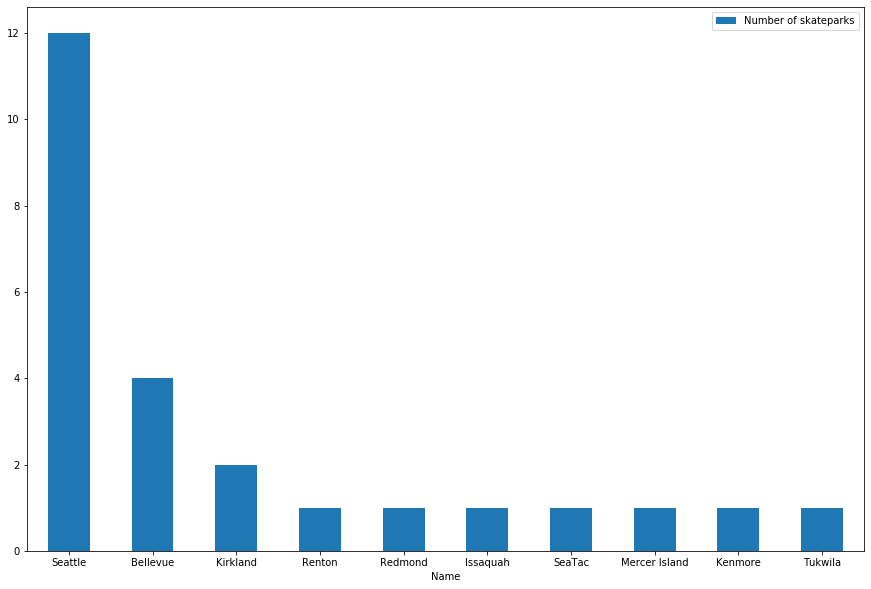

In [45]:
washington_king_skateparks.plot.bar(x='Name', y='Number of skateparks', rot=0, figsize=(15, 10))

As you can see, Seattle has by far the most skateparks with a total of 13. Bellevue is second with a total of 4. <a name="results-num-of-skateparks">[link]</a>

How does the number of skateparks compare with the cities population size?

In [46]:
for city, numOfSkateParks, pop in zip(washington_king_skateparks['Name'], washington_king_skateparks['Number of skateparks'], washington_king_skateparks['Population 2019 Estimate']):
    print("The city of {} has {} skatepark(s) for a population of {}.".format(city, numOfSkateParks, pop))

The city of Seattle has 12.0 skatepark(s) for a population of 753675.
The city of Bellevue has 4.0 skatepark(s) for a population of 148164.
The city of Kirkland has 2.0 skatepark(s) for a population of 93010.
The city of Renton has 1.0 skatepark(s) for a population of 101751.
The city of Redmond has 1.0 skatepark(s) for a population of 71929.
The city of Issaquah has 1.0 skatepark(s) for a population of 39509.
The city of SeaTac has 1.0 skatepark(s) for a population of 29044.
The city of Mercer Island has 1.0 skatepark(s) for a population of 25894.
The city of Kenmore has 1.0 skatepark(s) for a population of 23097.
The city of Tukwila has 1.0 skatepark(s) for a population of 20347.


In [47]:
# copy the data
df_max_scaled = washington_king_skateparks[['Name','Population 2019 Estimate','Number of skateparks']].copy()
  
# apply normalization techniques
df_max_scaled['Number of skateparks'] = df_max_scaled['Number of skateparks']  / df_max_scaled['Number of skateparks'].abs().max()
df_max_scaled['Population 2019 Estimate'] = df_max_scaled['Population 2019 Estimate']  / df_max_scaled['Population 2019 Estimate'].abs().max()

# view normalized data
df_max_scaled.head()

,Name,Population 2019 Estimate,Number of skateparks
30,Seattle,1.000000,1.000000
2,Bellevue,0.196589,0.333333
16,Kirkland,0.123409,0.166667
27,Renton,0.135006,0.083333
26,Redmond,0.095438,0.083333


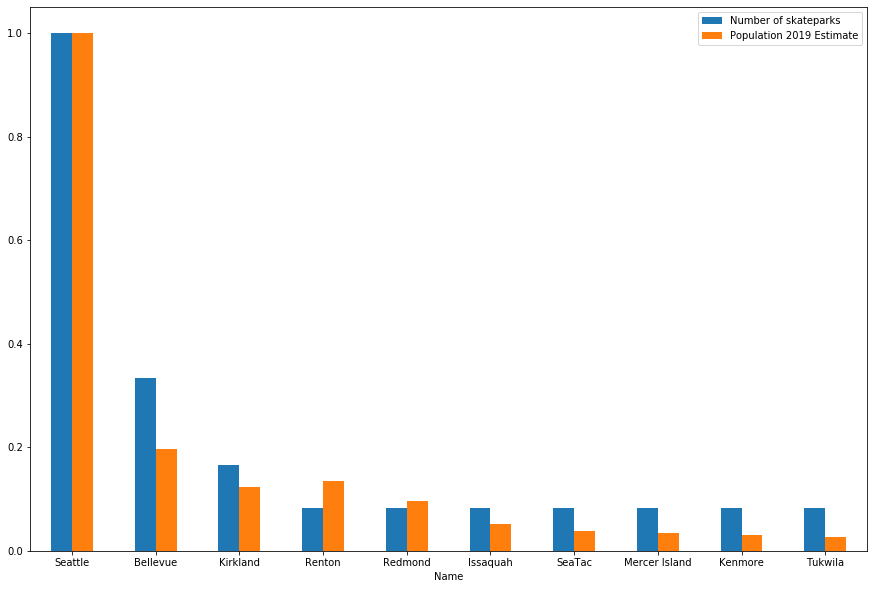

In [48]:
df_max_scaled.plot.bar(x='Name', y=['Number of skateparks','Population 2019 Estimate'], rot=0, figsize=(15, 10))

After normalizing the data, we can see how population compares to the number of skateparks. **Seattle** has the most population but has the most skateparks. On the other hand, **Devall** has only 1 skatepark but population is low enough that it wouldn't be crowded. Cities such as **Kent**, **Renton**, **Redmond**, and **Sammamish** have more population per skatepark. This could mean skateparks in these cities are more likely to be crowded. Building a new skatepark here could elivate crowd. <a name="results-skateparks-vs-pop">[link]</a>

---

## Results and Discussion <a name="results"></a>

A few questions and answers:

- **Which cities in King County are the largest. This may help determine how often it will be used.**
    - The cities with the highest population are Seattle, Bellevue, and Kent. [[link]](#results-highest-pop)
- **A city with a relatively low population but has a rising population growth might want a new skatepark. Which cities are these?**
    - Kirkland is the fastest growing city within the top 10. Kirkland grew 90.65% between 2010 to 2019. [[link]](#results-rising-pop)
- **Are there other skateparks nearby?**
    - Most skateparks are gonna be in Seattle. [[link]](#results-skateparks)
- **How many skateparks are in each city? A city with many skateparks may not need any more.**
    - Seattle has 13 skateparks, the most in King County. Then, Bellevue with 4. Then, Kent, Kirkland, and Issaquah tied with 2 skateparks. [[link]](#results-num-of-skateparks)
- **How does population size relate to the number of skateparks?**
    - After normalizing the data, we can see cities such as Kent, Renton, Redmond, and Sammamish have more population per skatepark. This could mean skateparks in these cities are more likely to be crowded. [[link]](#results-skateparks-vs-pop)

---

## Conclusion <a name="conclusion"></a>

Seattle has the most population but has the most skateparks. On the other hand, Devall has only 1 skatepark but population is low enough that it wouldn't be crowded. Cities such as Kent, Renton, Redmond, and Sammamish have more population per skatepark. This could mean skateparks in these cities are more likely to be crowded. Building a new skatepark here could elivate crowd.